# 2. Visualization

Visualizatin is vital in data analysis and scientific computing, to

* get intuitive understanding
* come up with a new hypothesis
* detect a bug or data anormaly

That is why we'll cover this topic at the beginning of this course.

## Matplotlib
Matplotlib is the standard graphics package for Python. 
It mimics many graphics functions of MATLAB.  
The Matplotlib gallery (http://matplotlib.org/stable/gallery) illustrates variety of plots.

Usually matplotlib opens a window for a new plot.

A nice feature of Jupyter notebook is that you can embed the figures produced by your program within the notebook by the following *magic* command  
`%matplotlib inline`  
(It may be a default setting in recent jupyter notebook).

In [53]:
%matplotlib inline

In [54]:
import numpy as np
import matplotlib.pyplot as plt

## Plotting functions
The standard way is to prepare an array for x values, compute y values, and call `plot( )` function.

In [55]:
# make an array from 0 to 10, the default is 50 points
x = np.linspace(0, 10)

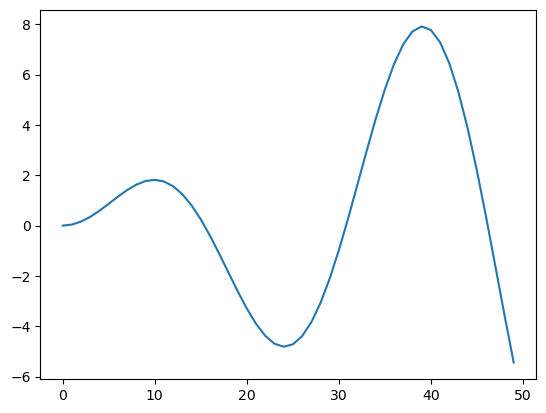

In [56]:
# comupute a function for each point
y = x*np.sin(x)
# plot the points
plt.plot(y)  # x is the index of y

There are multiple ways to pass variables to plot():
* `plot(y)`: x is assumed as the indices of y 
* `plot(x, y)`: specify both x and y values
* `plot(x1, y1, x2, y2,...)`: multiple lines
* `plot(x, Y)`: lines for columns of matrix Y

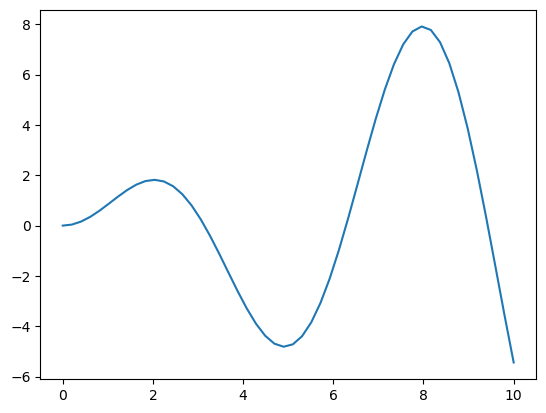

In [57]:
# specify both x and y values
plt.plot(x, y)

In [58]:
# take another function of x
y2 = x*np.cos(x)

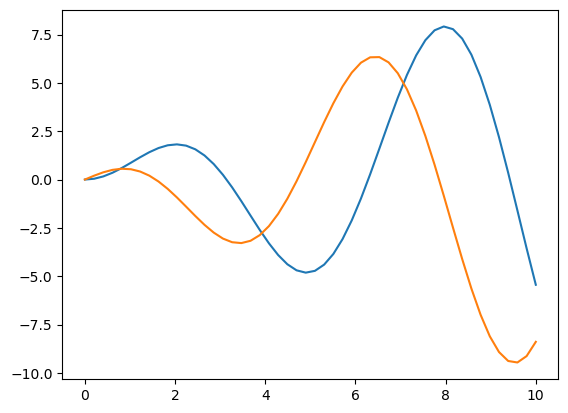

In [59]:
# plot two lines
plt.plot(x, y, x, y2)

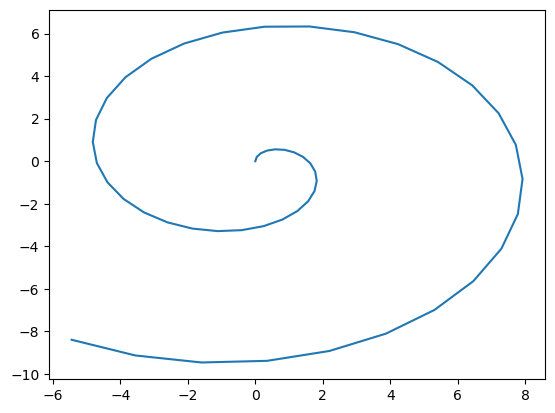

In [60]:
# phase plot
plt.plot(y, y2);
# you can supress <matplotlib...> output by ;

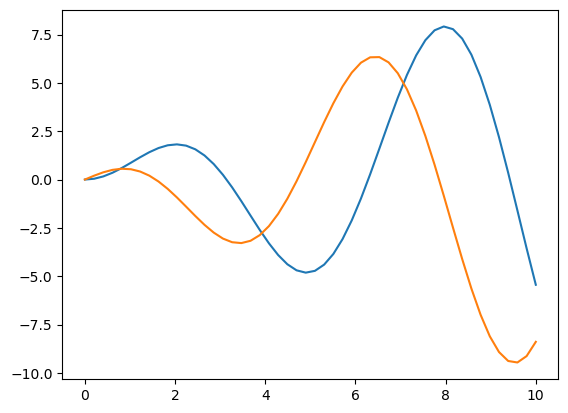

In [61]:
# plot multiple lines by a matrix
Y = np.array([y, y2])  # stack data in two rows
plt.plot(x, Y.T); # transpose to give data in two columns

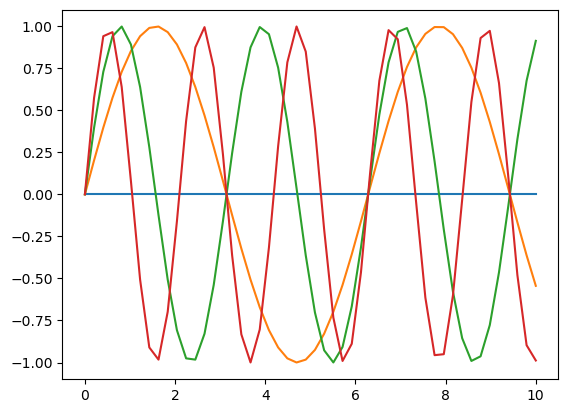

In [62]:
# plot multiple lines by a matrix
Y = np.array([np.sin(k*x) for k in range(4)])
plt.plot(x, Y.T);

## Options for plotting
Line styles can be specified by
* `color=` (or `c=` )  for color by code, name, RGB or RGBA  
    - code: 'r', 'g', 'b', 'y', 'c', 'm', 'k', 'w'


* `marker=` for marker style
    - code: '.', 'o', '+', '*', '^', ...


* `linestyle=` (or `ls=` ) for line style
    - code: '-', '--', ':', '-.', ...
    
    
* `linewidth=` (or `lw=` ) for line width
* a string of color, marker and line sytel codes, e.g. 'ro:'

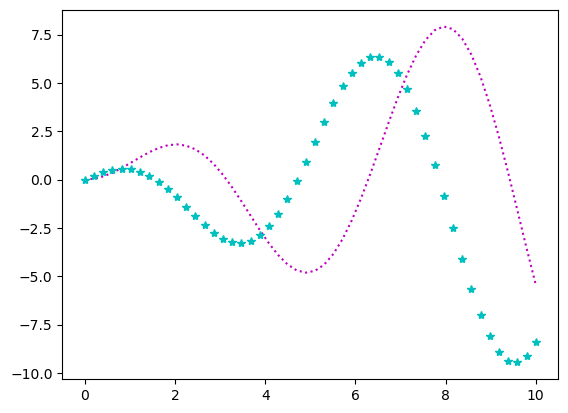

In [63]:
# using code string
plt.plot(x, y, 'm:', x, y2, 'c*');  # magenta dash-dot, cyan circle

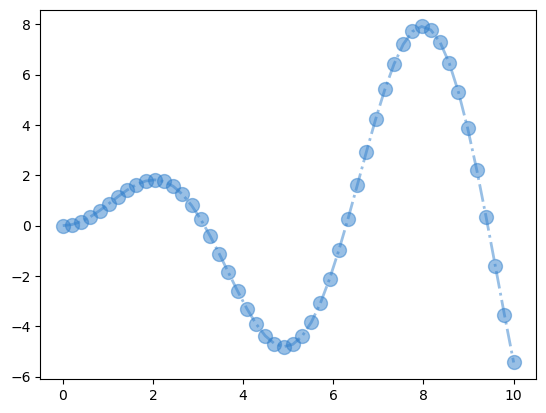

In [64]:
# using keyword=value
plt.plot(x, y, c=[0.2,0.5,0.8,0.5], marker='o', markersize=10, ls='-.', lw=2);

It's a good practice to add axis lables and plot title.

Text(0, 0.5, 'amplitude')

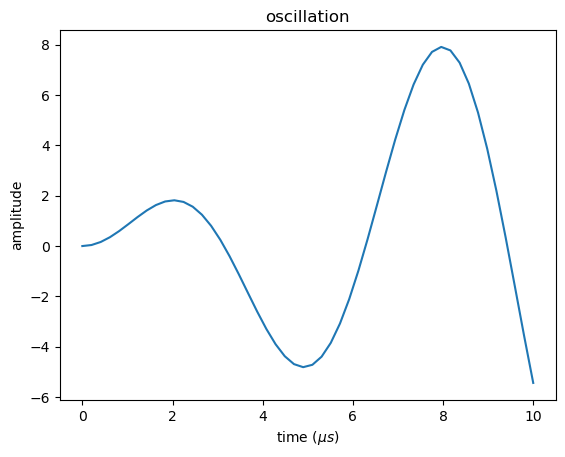

In [65]:
plt.plot(x, y)
plt.title('oscillation')
plt.xlabel('time ($\mu s$)')
plt.ylabel('amplitude')

It is also nice to add a legend box.

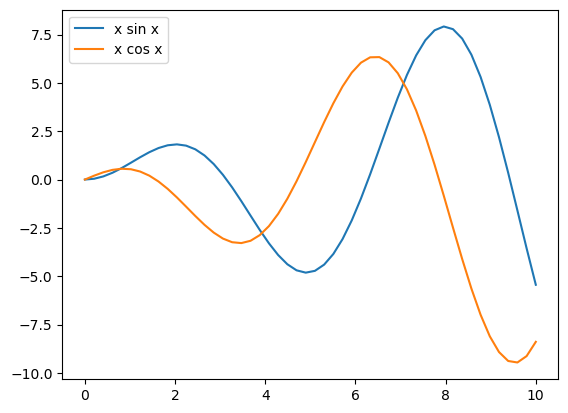

In [66]:
ax = plt.plot(x, y, x, y2)
plt.legend(('x sin x','x cos x'))

You can control axis ranges and scaling.

(-4.0, 4.0)

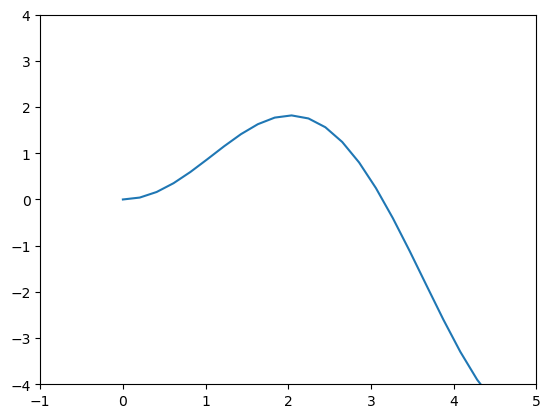

In [67]:
plt.plot(x, y)
plt.xlim(-1, 5)
plt.ylim(-4, 4)

(-6.10798067784125, 8.582949839004911, -10.247801600732576, 7.121229063313089)

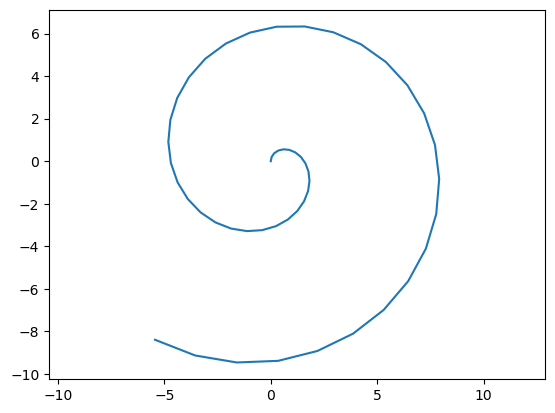

In [68]:
plt.plot(y, y2)
plt.axis('equal')  # equal scaling for x and y

(-6.10798067784125, 11.261049986204412, -10.247801600732576, 7.121229063313088)

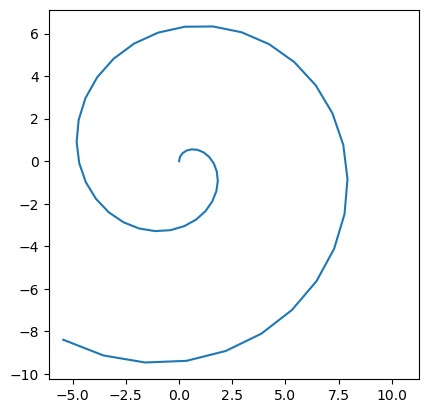

In [69]:
plt.plot(y, y2)
plt.axis('square')  # in square plot area

You can create a fiure of your preferred size by `plt.figure()` function

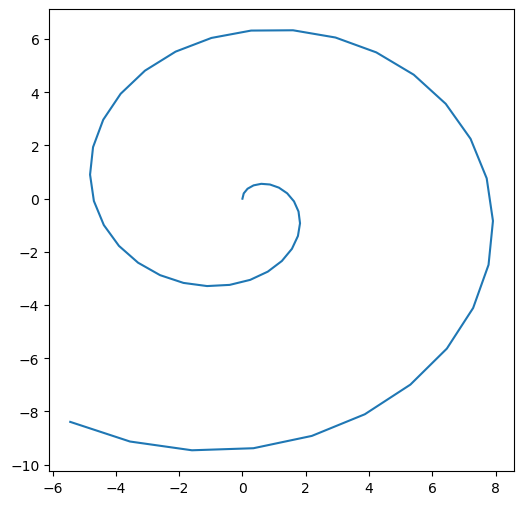

In [70]:
fig = plt.figure(figsize=(6, 6))
plt.plot(y, y2)

## Bar plot and histogram

<BarContainer object of 10 artists>

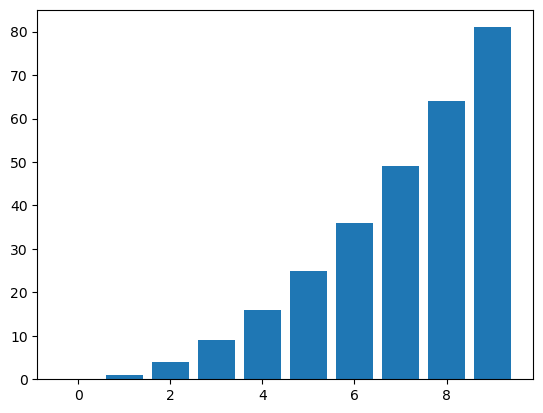

In [71]:
i = np.arange(10)
j = i**2
plt.bar(i, j)

`np.random.randn()` gives random numbers from the normal distribution

(array([ 2.,  6., 11., 11., 19., 25., 13.,  8.,  4.,  1.]),
 array([-2.23503761, -1.75989403, -1.28475046, -0.80960688, -0.33446331,
         0.14068027,  0.61582384,  1.09096742,  1.56611099,  2.04125457,
         2.51639814]),
 <BarContainer object of 10 artists>)

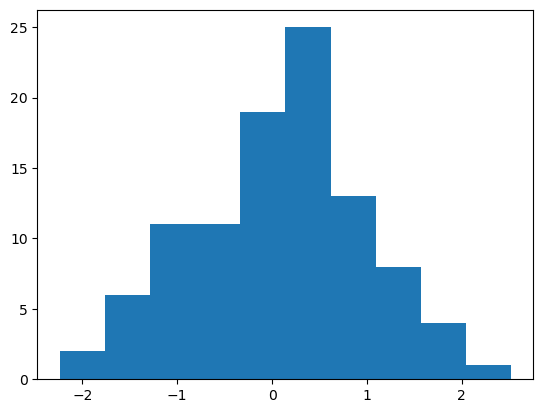

In [72]:
z = np.random.randn(100)
plt.hist(z)

## Subplot and axes
You can create multiple *axes* in a figure by subplot(rows, columns, index).   
It uses a MATLAB legacy for index starting from 1.  

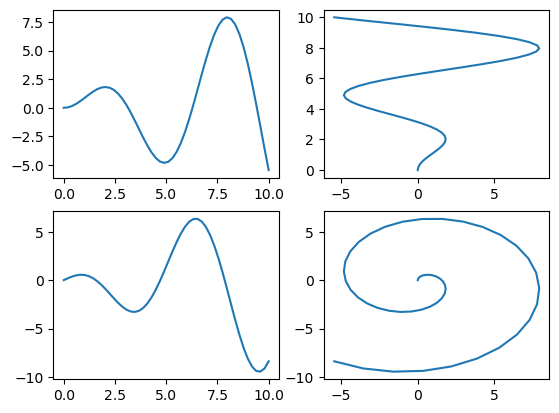

In [73]:
plt.subplot(2, 2, 1)
plt.plot(x, y)
plt.subplot(2, 2, 2)
plt.plot(y, x)
plt.subplot(2, 2, 3)
plt.plot(x, y2)
plt.subplot(2, 2, 4)
plt.plot(y, y2)

## Figure and axes
When you make a plot, matplotlib creates a *figure* object with an *axes* object.  
You can use `gcf()` and `gca()` to identify them and `getp()` and `setp()` to access their parameters.

    agg_filter = None
    alpha = None
    animated = False
    axes = [<AxesSubplot:>]
    children = [<matplotlib.patches.Rectangle object at 0x1370d73...
    clip_box = None
    clip_on = True
    clip_path = None
    constrained_layout = False
    constrained_layout_pads = (0.04167, 0.04167, 0.02, 0.02)
    default_bbox_extra_artists = [<AxesSubplot:>, <matplotlib.lines.Line2D object a...
    dpi = 100.0
    edgecolor = (1.0, 1.0, 1.0, 1.0)
    facecolor = (1.0, 1.0, 1.0, 1.0)
    figheight = 4.8
    figure = Figure(640x480)
    figwidth = 6.4
    frameon = True
    gid = None
    in_layout = True
    label = 
    linewidth = 0.0
    path_effects = []
    picker = None
    rasterized = False
    size_inches = [6.4 4.8]
    sketch_params = None
    snap = None
    tight_layout = False
    transform = IdentityTransform()
    transformed_clip_path_and_affine = (None, None)
    url = None
    visible = True
    window_extent = TransformedBbox(     Bbox(x0=0.0, y0=0.0, x1=6.4, ...
    z

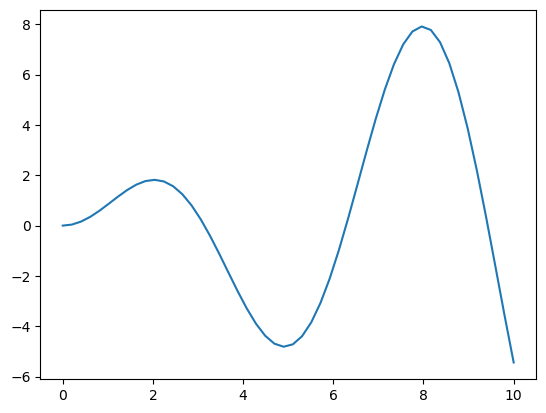

In [74]:
plt.plot(x, y)
fig = plt.gcf()  # get current figure
plt.getp(fig)  # show all parameters

[None, None]

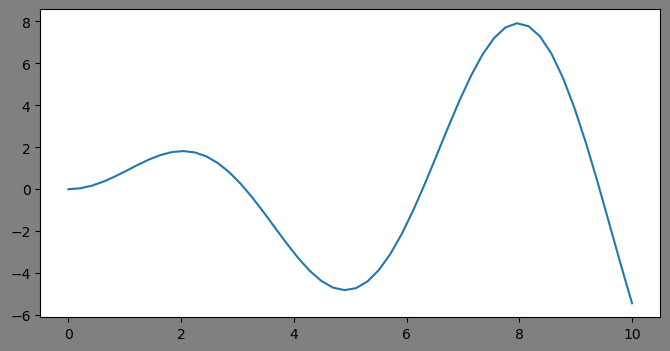

In [75]:
plt.plot(x, y)
fig = plt.gcf()
plt.setp(fig, size_inches=(8,4), facecolor=[0.5,0.5,0.5])

    adjustable = box
    agg_filter = None
    alpha = None
    anchor = C
    animated = False
    aspect = auto
    autoscale_on = True
    autoscalex_on = True
    autoscaley_on = True
    axes_locator = None
    axisbelow = line
    box_aspect = None
    children = [<matplotlib.lines.Line2D object at 0x127ccf100>, ...
    clip_box = None
    clip_on = True
    clip_path = None
    data_ratio = 1.3355391378951056
    default_bbox_extra_artists = [<matplotlib.lines.Line2D object at 0x127ccf100>, ...
    facecolor or fc = (1.0, 1.0, 1.0, 1.0)
    figure = Figure(640x480)
    frame_on = True
    geometry = (1, 1, 1)
    gid = None
    gridspec = GridSpec(1, 1)
    images = <a list of 0 AxesImage objects>
    in_layout = True
    label = 
    legend = None
    legend_handles_labels = ([], [])
    lines = <a list of 1 Line2D objects>
    navigate = True
    navigate_mode = None
    path_effects = []
    picker = None
    position = Bbox(x0=0.125, y0=0.10999999999999999, x1=0.9, y1=...
  

[None]

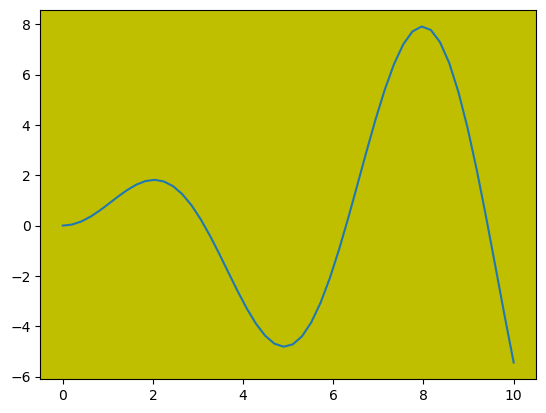

In [76]:
plt.plot(x, y)
ax = plt.gca()  # get current axes
plt.getp(ax)
plt.setp(ax, facecolor='y')  # change parameters

## Visualizing data in 2D
A standard way for visualizing pariwise data is a scatter plot.

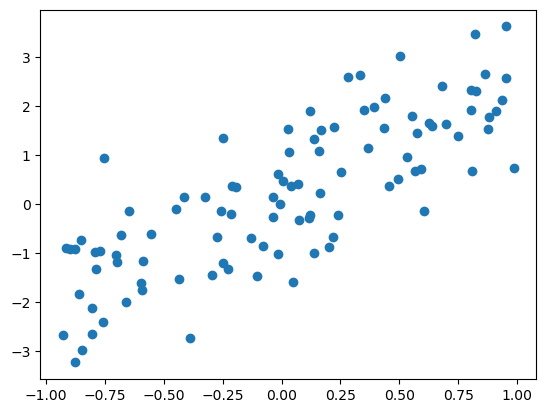

In [77]:
n = 100
x = np.random.uniform(-1, 1, n)  # n points in [-1,1]
y = 2*x + np.random.randn(n)  # scale and add noise
plt.plot(x, y, 'o')

By `scatterplot( )` you can specify the size and the color of each point to visualize higher dimension information.

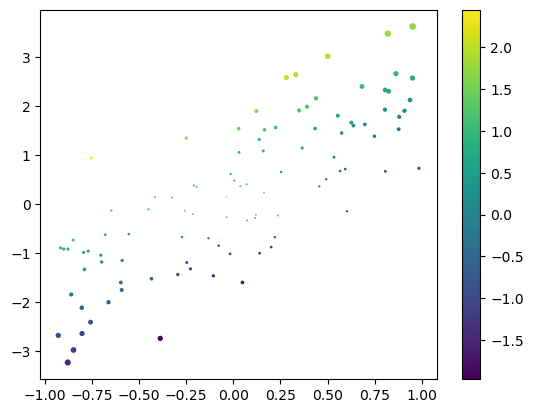

In [78]:
z = x**2 + y**2
c = y - 2*x
# z for size, c for color
plt.scatter(x, y, z, c)
plt.colorbar()

## Visualizing a matrix or a function in 2D space

meshgrid() is for preparing x and y values in a grid.

In [79]:
x = np.linspace(-4, 4, 9)
y = np.linspace(-3, 3, 7)
print(x, y)
X, Y = np.meshgrid(x, y)
print(X, Y)

[-4. -3. -2. -1.  0.  1.  2.  3.  4.] [-3. -2. -1.  0.  1.  2.  3.]
[[-4. -3. -2. -1.  0.  1.  2.  3.  4.]
 [-4. -3. -2. -1.  0.  1.  2.  3.  4.]
 [-4. -3. -2. -1.  0.  1.  2.  3.  4.]
 [-4. -3. -2. -1.  0.  1.  2.  3.  4.]
 [-4. -3. -2. -1.  0.  1.  2.  3.  4.]
 [-4. -3. -2. -1.  0.  1.  2.  3.  4.]
 [-4. -3. -2. -1.  0.  1.  2.  3.  4.]] [[-3. -3. -3. -3. -3. -3. -3. -3. -3.]
 [-2. -2. -2. -2. -2. -2. -2. -2. -2.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 2.  2.  2.  2.  2.  2.  2.  2.  2.]
 [ 3.  3.  3.  3.  3.  3.  3.  3.  3.]]


We can use imshow() to visualize a matrix as an image.

[[-48. -27. -12.  -3.  -0.  -3. -12. -27. -48.]
 [-32. -18.  -8.  -2.  -0.  -2.  -8. -18. -32.]
 [-16.  -9.  -4.  -1.  -0.  -1.  -4.  -9. -16.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 16.   9.   4.   1.   0.   1.   4.   9.  16.]
 [ 32.  18.   8.   2.   0.   2.   8.  18.  32.]
 [ 48.  27.  12.   3.   0.   3.  12.  27.  48.]]


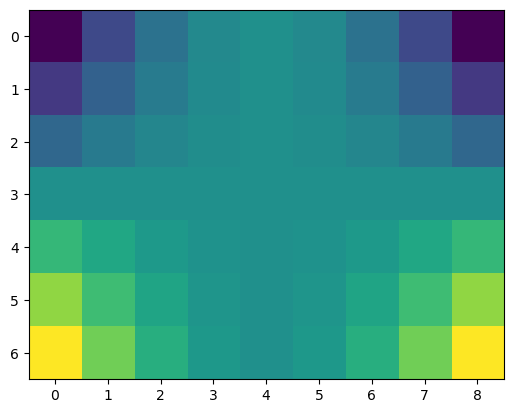

In [80]:
Z = X**2 * Y
print(Z)
plt.imshow(Z)

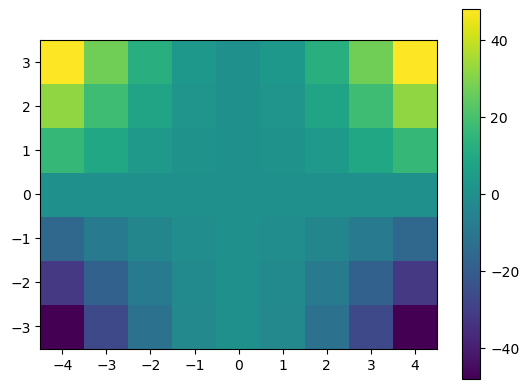

In [81]:
# some more options
plt.imshow(Z, origin='lower', extent=(-4.5, 4.5, -3.5, 3.5))
plt.colorbar()

### color maps
`imshow( )` maps a scalar Z value to color by a colormap. The standard color map *viridis* is friedly to color blindness and monochrome printing. You can also choose other color maps.

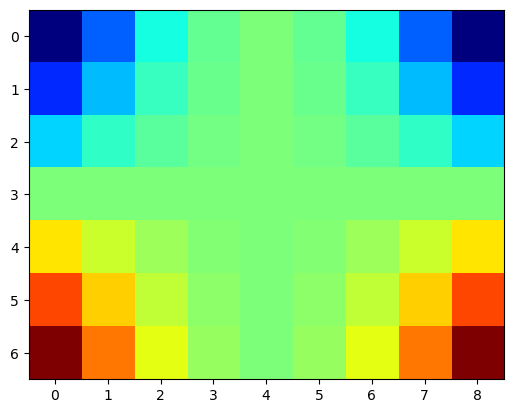

In [82]:
plt.imshow(Z, cmap='jet')

### contour plot

(-4.0, 4.0, -4.0, 4.0)

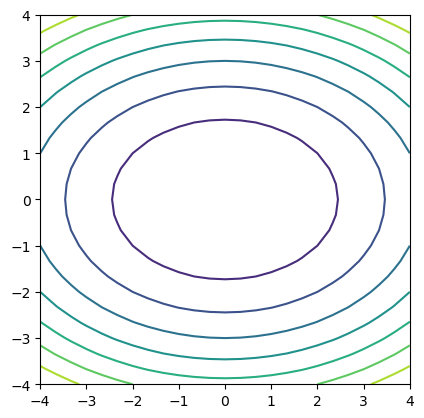

In [83]:
x = np.linspace(-4, 4, 25)
y = np.linspace(-4, 4, 25)
X, Y = np.meshgrid(x, y)
Z = X**2 + 2*Y**2
plt.contour(X, Y, Z)
plt.axis('square')

### vector field by `quiver( )`

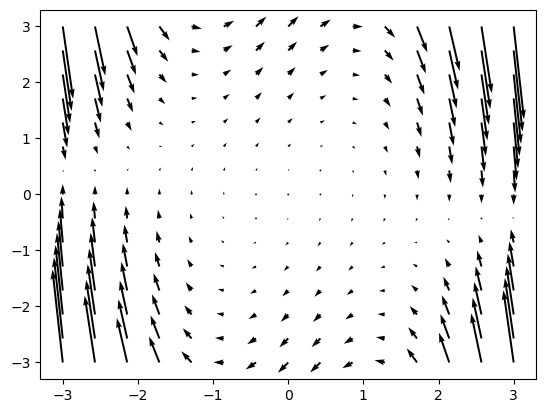

In [84]:
x = np.linspace(-3, 3, 15)
y = np.linspace(-3, 3, 15)
X, Y = np.meshgrid(x, y)
# Van del Pol model
k = 1  # paramter
U = Y  # dx/dt
V = k*(1 - X**2)*Y - X  # dy/dt
plt.quiver(X, Y, U, V)